Working on quetion 2 to build WGAN model. As a first step build GAN model with given images. spent whole time in gan building

reference:
https://www.kaggle.com/code/jutrera/simple-gan
https://anderfernandez.com/en/blog/how-to-code-gan-in-python/
https://github.com/km1414/GAN/blob/master/gan.py
https://www.geeksforgeeks.org/generative-adversarial-network-gan/#google_vignette
https://github.com/km1414/GAN/blob/master/gan.py


In [1]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Owner\AppData\Local\Temp\pip-install-smr9dxx6\tensorflow-gpu_1dda67d9dfe240f7beddab958a8b1769\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [2]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import os          # use for travel in documents
from numpy.random import randint, uniform
import random

# for part 2: remove doddgy image
import cv2         # coder can us computer vision feature with cv2
import imghdr      # for check extension of the image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import PIL
import PIL.Image

C:\Users\Owner\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Run gpu for code
gpu = tf.test.gpu_device_name()
if gpu:
    print("GPU is running")
else:
    print("GPU is not running")

GPU is not running


In [4]:
foldes = os.listdir('FaceExpressions/dataset')
data = pd.read_csv('FaceExpressions/data.csv')
data.shape

(15453, 3)

In [5]:
# Folder name in array form:
image_type = [i for i in os.listdir('FaceExpressions/dataset')]
image_type

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [6]:
# path of each folder

Ahegao = 'FaceExpressions/dataset/Ahegao'
Angry = 'FaceExpressions/dataset/Angry'
Happy = 'FaceExpressions/dataset/Happy'
Neutral = 'FaceExpressions/dataset/Neutral'
Sad = 'FaceExpressions/dataset/Sad'
Surprise = 'FaceExpressions/dataset/Surprise'

In [7]:
# change path data iin csv file 
def change_path(path):
    x = 'FaceExpressions/dataset/'+path
    return x

data['path'] = data['path'].apply(lambda i: change_path(i))
data

,Unnamed: 0,path,label
0,0,FaceExpressions/dataset/Surprise/1bd930d6a1c71...,Surprise
1,1,FaceExpressions/dataset/Surprise/cropped_emoti...,Surprise
2,2,FaceExpressions/dataset/Surprise/0df0e470e3309...,Surprise
3,3,FaceExpressions/dataset/Surprise/cropped_emoti...,Surprise
4,4,FaceExpressions/dataset/Surprise/cropped_emoti...,Surprise
...,...,...,...
15448,15448,FaceExpressions/dataset/Angry/cropped_emotions...,Angry
15449,15449,FaceExpressions/dataset/Angry/cropped_emotions...,Angry
15450,15450,FaceExpressions/dataset/Angry/cropped_emotions...,Angry
15451,15451,FaceExpressions/dataset/Angry/0aa9ec997e4faa44...,Angry


data = data.assign(image=image)
n = random.randrange(data['image'].shape[0])

plt.imshow(data['image'][n], cmap='gray')
plt.show()

In [8]:
data.head(3)

,Unnamed: 0,path,label
0,0,FaceExpressions/dataset/Surprise/1bd930d6a1c71...,Surprise
1,1,FaceExpressions/dataset/Surprise/cropped_emoti...,Surprise
2,2,FaceExpressions/dataset/Surprise/0df0e470e3309...,Surprise


In [9]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(data['path'], data['label'], test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
type(X_train)

numpy.ndarray

In [10]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, LeakyReLU, Conv2DTranspose, Reshape, Dropout, BatchNormalization

dim = 100

In [11]:
# Generative model
def generative():
    generator_input = layers.Input(shape=(dim,))

    # First, transform the input into a 16x16 128-channels feature map
    x = layers.Dense(128 * 16 * 16)(generator_input)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((16, 16, 128))(x)

    # Then, add a convolution layer
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Upsample to 32x32
    x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)
    
    # Upsample to 32x32
    x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Few more conv layers
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Produce a 32x32 1-channel feature map
    x = layers.Conv2D(3, 7, padding='same')(x)
    x = layers.LeakyReLU()(x)
    generator = Model(generator_input, x)
    generator.summary()

    return generator

In [12]:
# Descriminative model
def discriminator():
    discriminator_input = layers.Input(shape=(64, 64, 3))
    x = layers.Conv2D(128, 3)(discriminator_input)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Flatten()(x)

    # One dropout layer - important trick!
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(10)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.4)(x)

    # Classification layer
    x = layers.Dense(1)(x)

    discriminator = Model(discriminator_input, x)
    discriminator.summary()

    return discriminator

In [13]:

# Get Optimizer
def optimizer():
    return tf.keras.optimizers.Adam()

optm = optimizer()

In [14]:
# Connect both generator and discriminator
def gan(disc, gen):
    disc.trainable = False
    gan_input = layers.Input(shape=(dim,))
    gan_output = disc(gen(gan_input))
    gan = Model(gan_input, gan_output)
    
    return gan

In [15]:
# Compile discriminator and generator model
discriminator_model = discriminator()
discriminator_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 62, 62, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       262272    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 30, 30, 128)       0         
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dropout (Dropout)           (None, 115200)            0     

In [16]:
generative_model = generative()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 32768)             3309568   
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      1048

In [17]:
gan_model = gan(discriminator_model, generative_model)
gan_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [18]:
# Generate imahge
from pathlib import Path
from PIL import Image, ImageOps
import cv2

def create_img(X_train, idx, size):
    img = Image.open(X_train[idx])
    img = np.array(img)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.0
    return img
    

In [19]:
def display_image(save2file = False, fake = True, sample = 16, images = None, dpi = 80):
    mul = sample
    
    plt.figure()
    for i in range(0,sample):
        plt.subplot(4,4,i+1)
        image = images[i,:,:,:]
        print(image.shape)
        plt.imshow((image))
        plt.axis('off')
    plt.tight_layout()
    if save2file:
        print('true')
    else:
        plt.show()

In [20]:

def plot_image(image, save2file=False, dpi=80):
    print(image.shape)
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    if save2file:
        plt.savefig(filename)
        plt.close('all')
    else:
        plt.show()

(64, 64, 3)


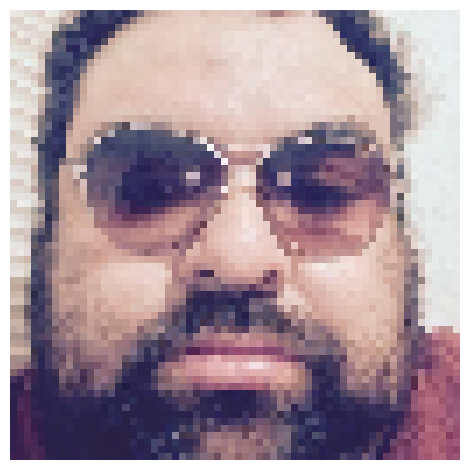

In [21]:
im = create_img(X_train, 5, (64, 64))
plot_image(im, False, dpi=10)

2/2 [==============================] - 30s 15s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)


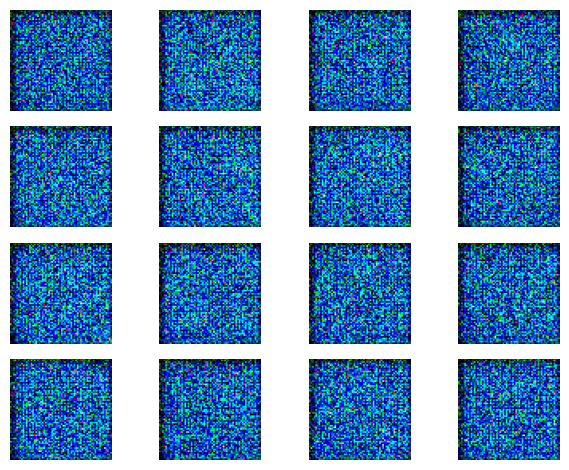

In [22]:
gen_img = generative_model.predict(np.random.normal(size=(64, 100)))
gen_img = gen_img.astype('float32') * 255.0
display_image(save2file = False, fake = True, sample = 16, images = gen_img, dpi = 80)

In [ ]:
# Train the data
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

inter = 1
start = 0
for i in tqdm(range(inter)):
    ran_vector = np.random.normal(size=(64, 100))
    gen_img = generative_model.predict(ran_vector)
    stop = start + 64
    legit_img = np.zeros((64, 64, 64, 3))
    
    cnt = 0
    for j in range(start, stop):
        legit_img[cnt] = create_img(X_train, j, (64, 64))
        cnt += 1
        
        real_label = np.ones((64,1))
        fake_label = np.ones((64,1))
        
        #add noise randomly
        real_label += 0.05 * np.random.random(real_label.shape)
        fake_label += 0.05 * np.random.random(fake_label.shape)
        
        #train discriminative model
        disc_loss1 = discriminator_model.train_on_batch(legit_img, real_label)
        disc_loss2 = discriminator_model.train_on_batch(gen_img, -fake_label)
        disc_loss = int(0.5)*((disc_loss1 + disc_loss2))
        
        #sample of random point
        ran_vector = np.random.normal(size=(64, 100))
        mislead = np.ones((64, 1))
        
        #train generator in gan
        loss = gan_model.train_on_batch(ran_vector, mislead)
        
        start += 64
        if start > len(X_train) - 64:
            start = 0
            
        if i % 100 == 0:
             print(f'discriminator_loss_step {i}:\t {disc_loss} \t-- adversarial_loss_step {i}:\t {loss}')
        
        if i % 500 == 0:
            show_img = np.concatenate([legit_img[:12], gen_img[:12]])
            display_image(save2file = False, fake = True, sample = 16, images = show_img, dpi = 80)

1/1 [==============================] - 14s 14s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


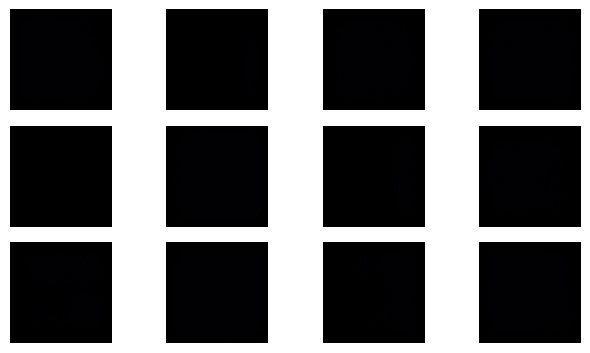

1/1 [==============================] - 16s 16s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


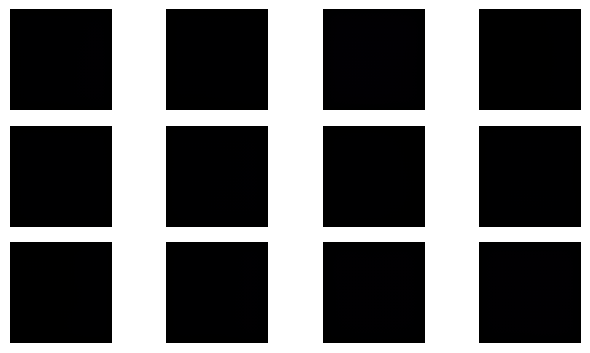

1/1 [==============================] - 16s 16s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


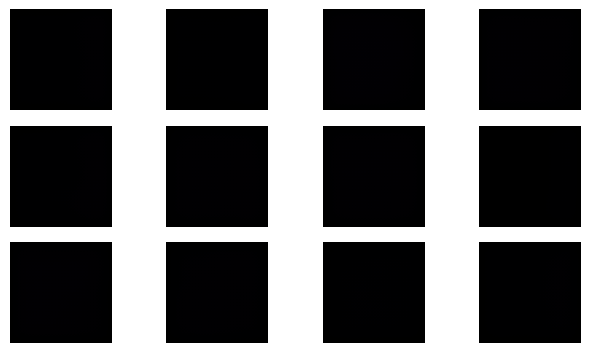

1/1 [==============================] - 15s 15s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


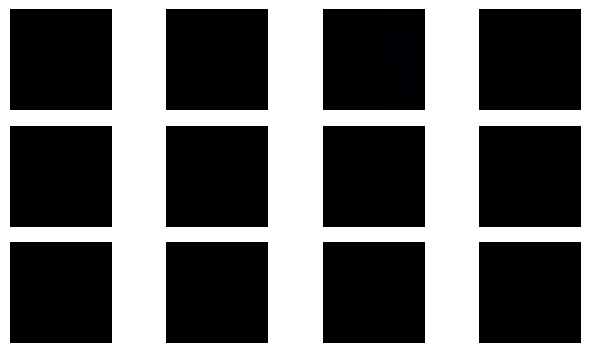

1/1 [==============================] - 15s 15s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


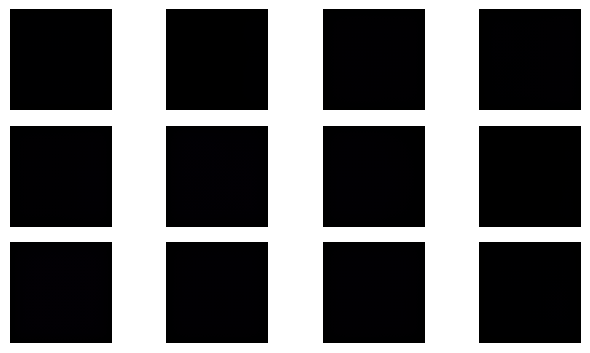

1/1 [==============================] - 14s 14s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



(64, 64, 3)


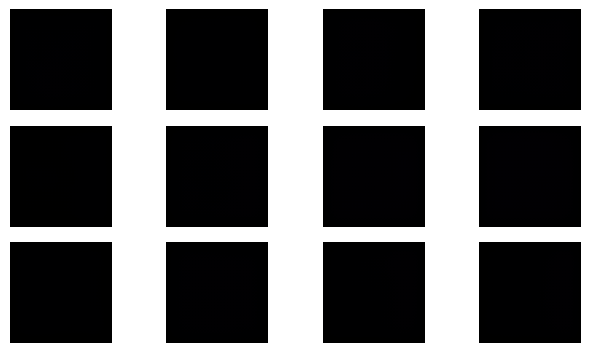

1/1 [==============================] - 15s 15s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


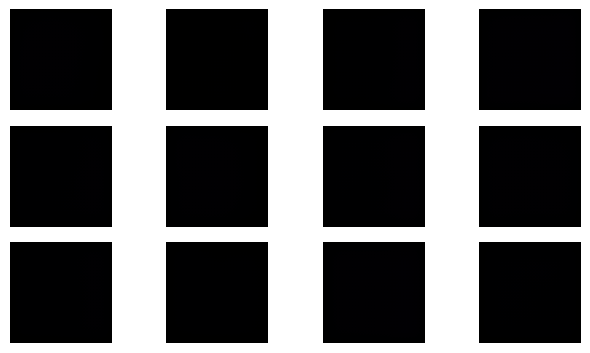

KeyboardInterrupt: 

In [26]:
for i in range(0, 10):
    ran_vector = np.random.normal(size=(32, 100))
    gen_img = generative_model.predict(ran_vector)
    gen_img = gen_img.astype('float32')/255
    display_image(save2file=False, fake=True, sample=12, images=gen_img[:20], dpi=150)